# Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [58]:
data=pd.read_csv("cities.csv")

In [59]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Data Preprocessing

In [60]:
# Convert 'Date Time' to datetime format
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [61]:
# Set 'Date Time' as the index
data.set_index('Date Time', inplace=True)

In [62]:
# Downsample the data to daily frequency
data_daily = data.resample('D').mean()

In [63]:
# Use a smaller subset of the data for modeling (last 2 years)
subset_data = data_daily[-2*365:]

In [64]:
data.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [65]:
# Drop any rows with NaN values
data_daily = data_daily.dropna()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [67]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


# Visualization

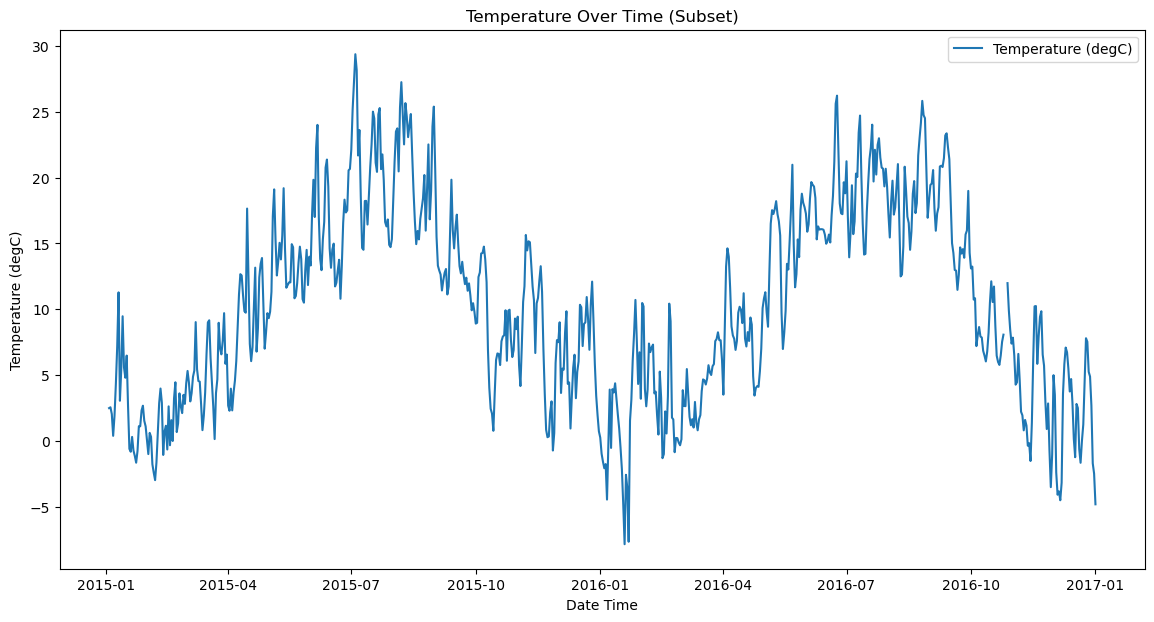

In [68]:
# Plot temperature over time
plt.figure(figsize=(14, 7))
plt.plot(subset_data['T (degC)'], label='Temperature (degC)')
plt.title('Temperature Over Time (Subset)')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

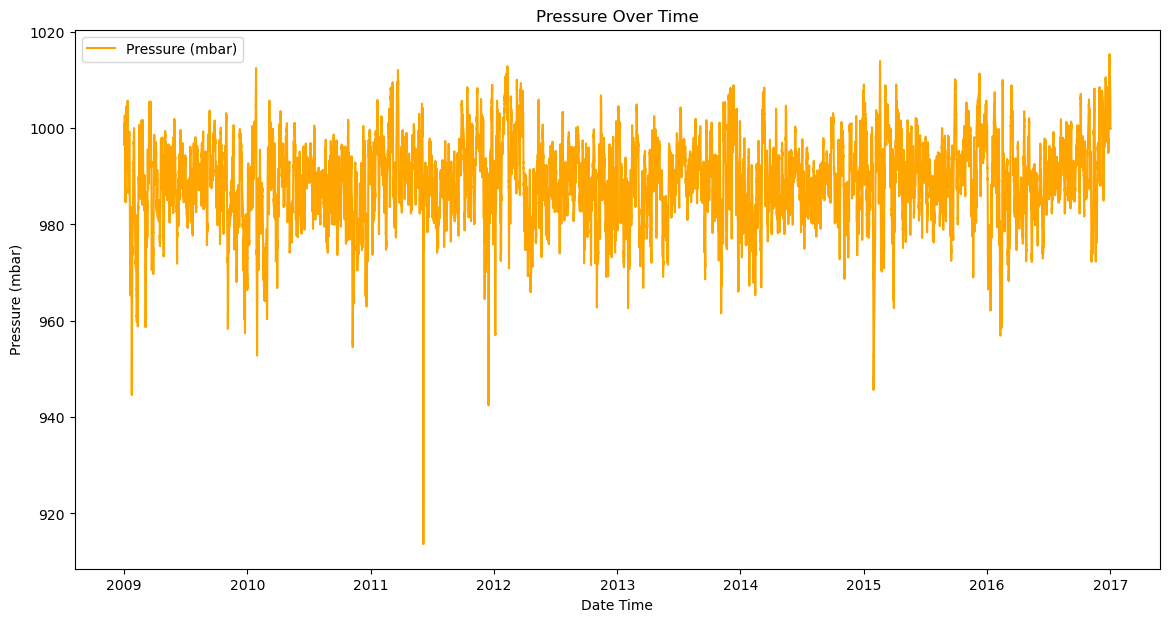

In [69]:
# Plot pressure over time
plt.figure(figsize=(14, 7))
plt.plot(data['p (mbar)'], label='Pressure (mbar)', color='orange')
plt.title('Pressure Over Time')
plt.xlabel('Date Time')
plt.ylabel('Pressure (mbar)')
plt.legend()
plt.show()

# Decompose the time series

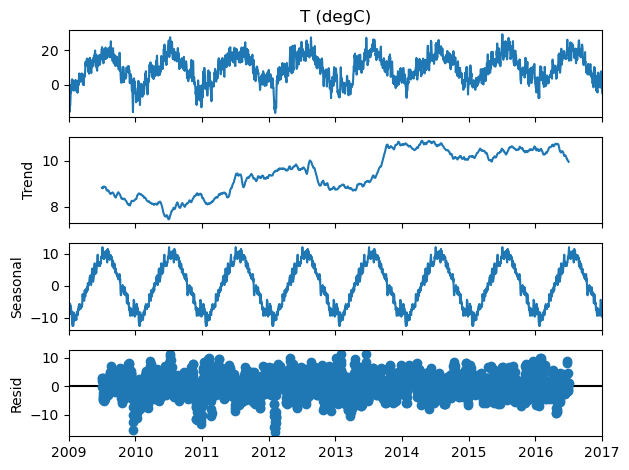

In [70]:
# Decompose the time series to see trend, seasonal, and residual components
result = seasonal_decompose(data_daily['T (degC)'], model='additive', period=365)
result.plot()
plt.show()

# Building Forecasting Model

## ARIMA Model

In [71]:
# Split the data into training and testing sets
train_size = int(len(data_daily) * 0.8)
train_arima = data_daily['T (degC)'].iloc[:train_size]
test_arima = data_daily['T (degC)'].iloc[train_size:]

In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
# Fit the ARIMA model
arima_model = ARIMA(train_arima, order=(5, 1, 0))
arima_result = arima_model.fit()

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [74]:
# Make predictions on the test set
predictions_arima = arima_result.forecast(steps=len(test_arima))
predictions_arima = pd.Series(predictions_arima, index=test_arima.index)

In [75]:
# Ensure no NaN values in predictions
predictions_arima = predictions_arima.dropna()
test_arima = test_arima.loc[predictions_arima.index]

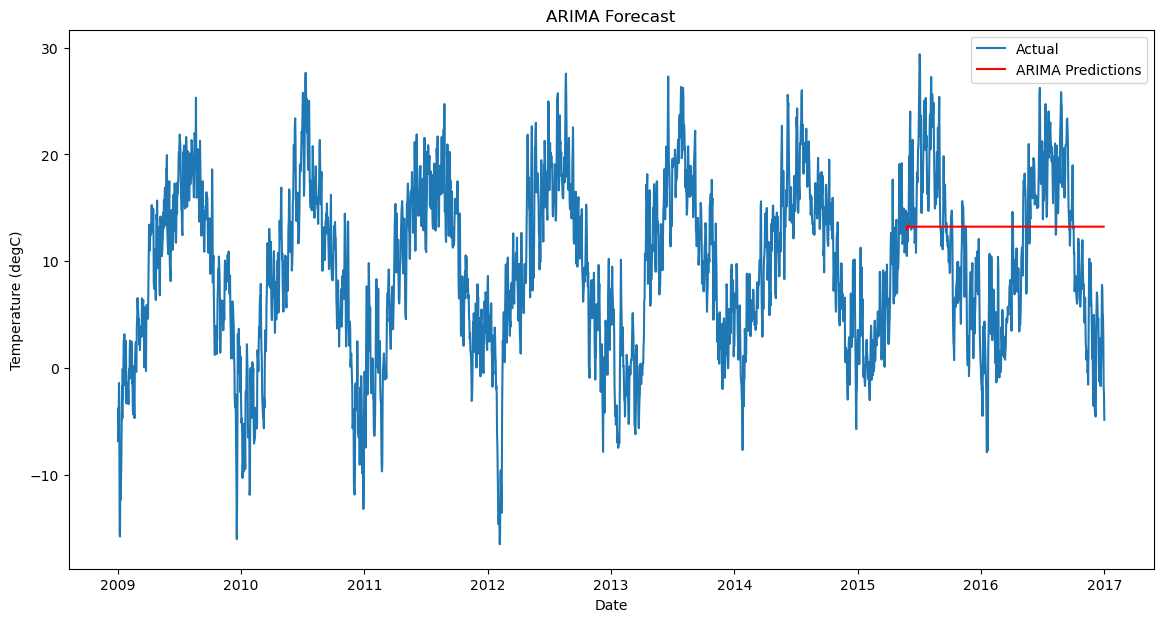

In [76]:
# Plot the ARIMA model predictions
plt.figure(figsize=(14, 7))
plt.plot(data_daily['T (degC)'], label='Actual')
plt.plot(predictions_arima, label='ARIMA Predictions', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

# Prophet Model

In [26]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/3e/bc/0be65769bf0fbcc07147b61f0feeca090f1d321f02df83bd0c4a83ecb642/cmdstanpy-1.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/42/12/22bead48246046529afec12833537d6fc99dee47e7432f6f290933d26c32/holidays-0.50-py3-none-any.whl.metadata
  Using cached holidays-0.50-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.o

In [77]:
from prophet import Prophet

In [78]:
# Prepare the data for Prophet
data_for_prophet = data_daily.reset_index()[['Date Time', 'T (degC)']]
data_for_prophet.columns = ['ds', 'y']

In [79]:
# Split the data into training and testing sets
train_prophet = data_for_prophet.iloc[:train_size]
test_prophet = data_for_prophet.iloc[train_size:]

In [80]:
# Initialize and fit the Prophet model on the training set
prophet_model = Prophet()
prophet_model.fit(train_prophet)

22:47:02 - cmdstanpy - INFO - Chain [1] start processing
22:47:03 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
# Make a dataframe for future predictions
future = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast = prophet_model.predict(future)

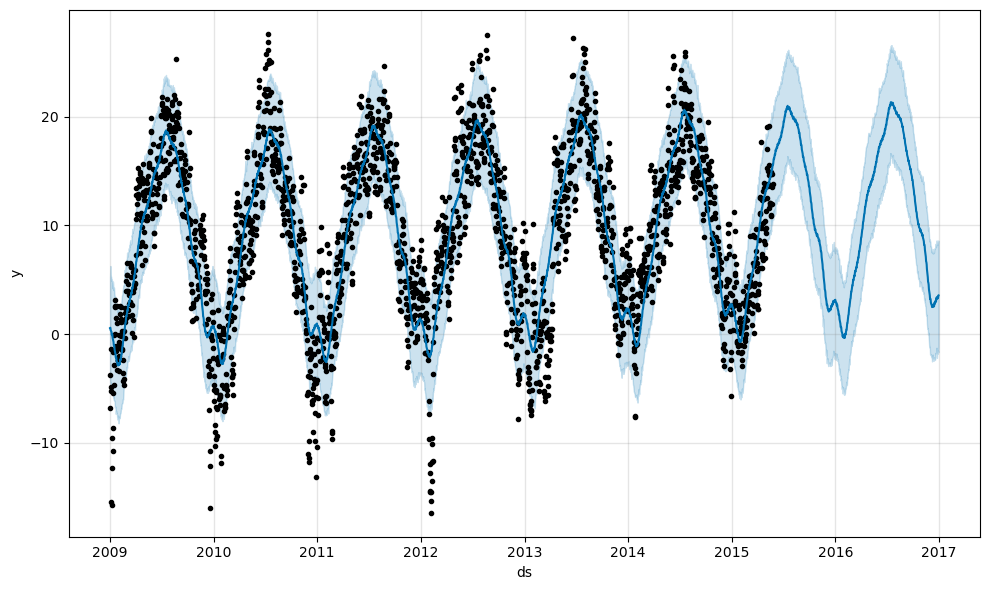

In [82]:
# Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()

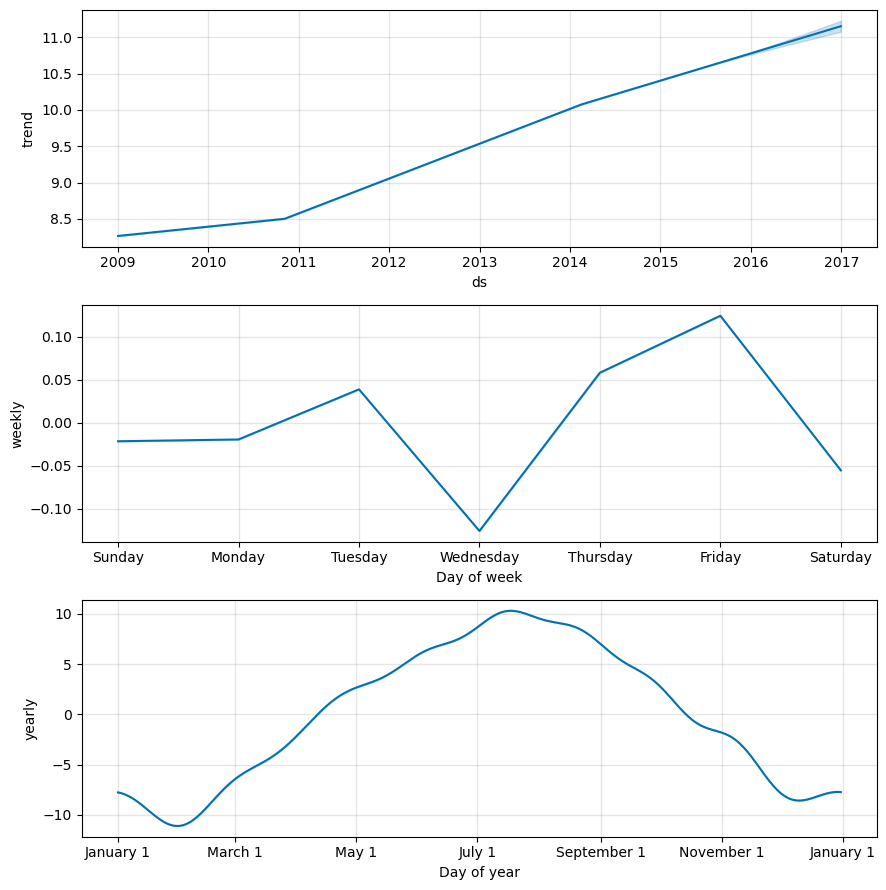

In [83]:
# Plot the forecast components
fig2 = prophet_model.plot_components(forecast)
plt.show()

# Evaluating and Comparing the Models

In [84]:
# Evaluate the ARIMA model
arima_mae = mean_absolute_error(test_arima, predictions_arima)
arima_mse = mean_squared_error(test_arima, predictions_arima)
arima_rmse = np.sqrt(arima_mse)

print(f'ARIMA MAE: {arima_mae}')
print(f'ARIMA MSE: {arima_mse}')
print(f'ARIMA RMSE: {arima_rmse}')

ARIMA MAE: 6.465299053087701
ARIMA MSE: 59.510877822677834
ARIMA RMSE: 7.714329382563195


In [85]:
# Evaluate the Prophet model
forecast_test = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test_prophet):]
prophet_mae = mean_absolute_error(test_prophet['y'], forecast_test['yhat'])
prophet_mse = mean_squared_error(test_prophet['y'], forecast_test['yhat'])
prophet_rmse = np.sqrt(prophet_mse)

print(f'Prophet MAE: {prophet_mae}')
print(f'Prophet MSE: {prophet_mse}')
print(f'Prophet RMSE: {prophet_rmse}')


Prophet MAE: 3.3079407179234535
Prophet MSE: 16.20309769380967
Prophet RMSE: 4.025307155213087


In [86]:
print("Model Evaluation Metrics:")
print(f"ARIMA MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}")
print(f"Prophet MAE: {prophet_mae}, MSE: {prophet_mse}, RMSE: {prophet_rmse}")

Model Evaluation Metrics:
ARIMA MAE: 6.465299053087701, MSE: 59.510877822677834, RMSE: 7.714329382563195
Prophet MAE: 3.3079407179234535, MSE: 16.20309769380967, RMSE: 4.025307155213087


In [87]:
# Compare the two models
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

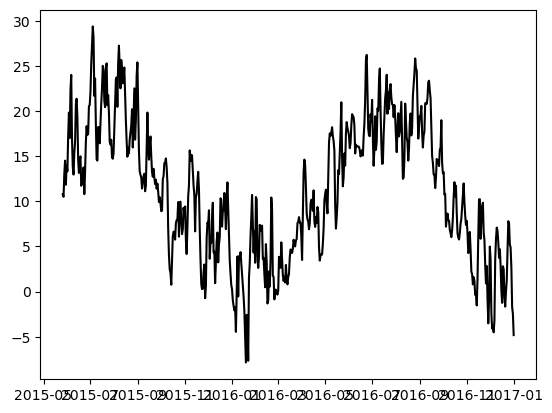

In [88]:
# Plot the actual test data
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual Data', color='black')

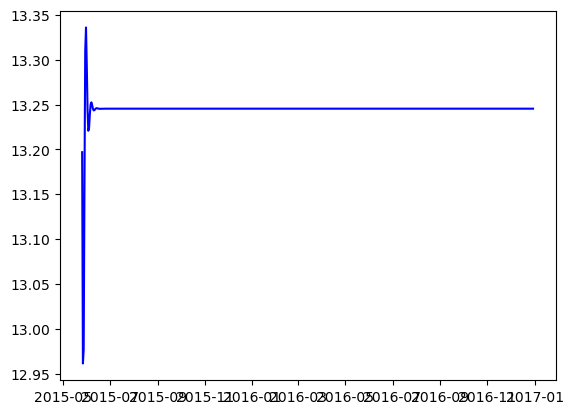

In [89]:
# Plot ARIMA predictions
plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Predictions', color='blue')

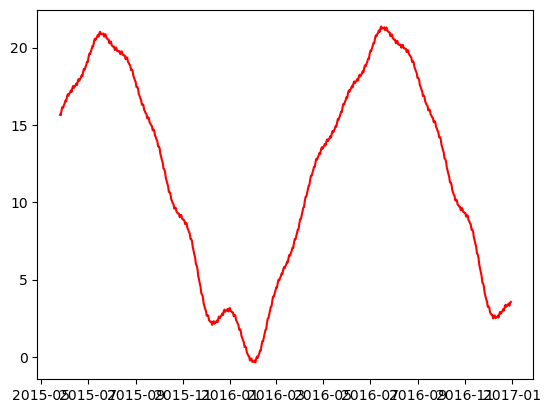

In [90]:
# Plot Prophet predictions
plt.plot(forecast_test.index, forecast_test['yhat'], label='Prophet Predictions', color='red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


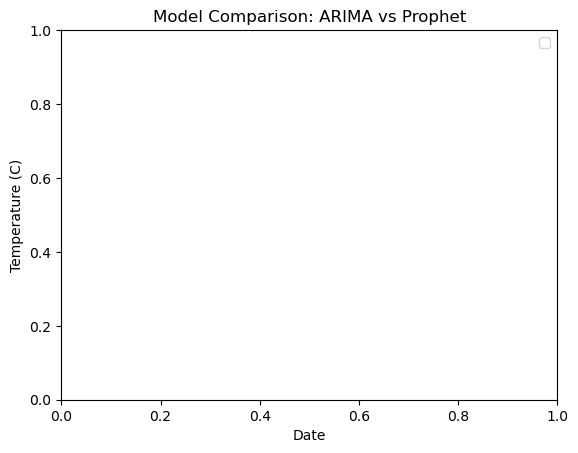

In [91]:
plt.title('Model Comparison: ARIMA vs Prophet')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()